# Import packages

In [127]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LogNorm
from PIL import Image
import numpy as np
from scipy import fftpack
from skimage import exposure
from skimage.restoration import unwrap_phase

# Read in images

In [128]:
bgRawImage = np.array(Image.open('BG1.tif'), dtype=np.float)
jetRawImage = np.array(Image.open('8bar1.tif'), dtype=np.float)

# Show images with ROI marked

Text(0.5, 1.0, 'Original jet image')

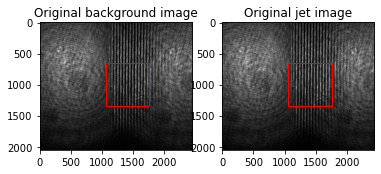

In [129]:
rectHor = 1060
rectVer = 650
rectWidth = 700
rectHeight = 700
fig,(axBg, axJet) = plt.subplots(1,2)
rectBg = patches.Rectangle((rectHor,rectVer),rectWidth,rectHeight,linewidth=1,edgecolor='r',facecolor='none') # (Hor,Ver), W,H
rectJet = patches.Rectangle((rectHor,rectVer),rectWidth,rectHeight,linewidth=1,edgecolor='r',facecolor='none') # (Hor,Ver), W,H
axBg.add_patch(rectBg)
axJet.add_patch(rectJet)
axBg.imshow(bgRawImage, plt.cm.gray)
axJet.imshow(jetRawImage, plt.cm.gray)
axBg.set_title('Original background image')
axJet.set_title('Original jet image')

# Select ROI for analysis

Text(0.5, 1.0, 'ROI jet image')

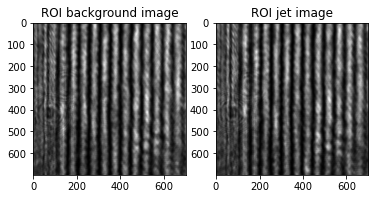

In [130]:
bgROIImage = bgRawImage[rectVer:rectVer+rectHeight,rectHor:rectHor+rectWidth]
jetROIImage = jetRawImage[rectVer:rectVer+rectHeight,rectHor:rectHor+rectWidth]

fig,(axBg, axJet) = plt.subplots(1,2)
axBg.imshow(bgROIImage, plt.cm.gray)
axJet.imshow(jetROIImage, plt.cm.gray)
axBg.set_title('ROI background image')
axJet.set_title('ROI jet image')

# FFT

Text(0.5, 1.0, 'FFT jet image')

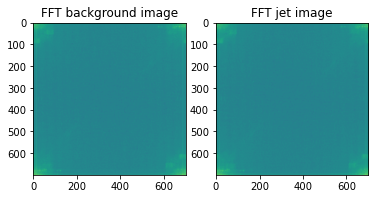

In [131]:
bgFFT = np.fft.fft2(bgROIImage)
jetFFT = np.fft.fft2(jetROIImage)

fig,(axBg, axJet) = plt.subplots(1,2)
axBg.imshow(np.abs(bgFFT), norm=LogNorm(vmin=5))
axJet.imshow(np.abs(jetFFT), norm=LogNorm(vmin=5))
axBg.set_title('FFT background image')
axJet.set_title('FFT jet image')

# Spectral filter

Text(0.5, 1.0, 'Filtered FFT jet image')

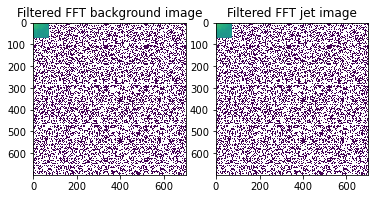

In [132]:
keep_fraction = 0.1

bgFFTCopy = bgFFT.copy()
jetFFTCopy = jetFFT.copy()

bgFFTRows, bgFFTCols = bgFFTCopy.shape
jetFFTRows, jetFFTCols = jetFFTCopy.shape

bgFFTCopy[int(bgFFTRows*keep_fraction):int(bgFFTRows)] = 0.0
bgFFTCopy[:,int(bgFFTCols*keep_fraction):int(bgFFTCols)] = 0.0
jetFFTCopy[int(jetFFTRows*keep_fraction):int(jetFFTRows)] = 0.0
jetFFTCopy[:,int(jetFFTCols*keep_fraction):int(jetFFTCols)] = 0.0
#bgFFTCopy[int(bgFFTRows*keep_fraction):int(bgFFTRows*(1-keep_fraction))] = 0.0
#bgFFTCopy[:,int(bgFFTCols*keep_fraction):int(bgFFTCols*(1-keep_fraction))] = 0.0
#jetFFTCopy[int(jetFFTRows*keep_fraction):int(jetFFTRows*(1-keep_fraction))] = 0.0
#jetFFTCopy[:,int(jetFFTCols*keep_fraction):int(jetFFTCols*(1-keep_fraction))] = 0.0

fig,(axBg, axJet) = plt.subplots(1,2)
axBg.imshow(np.abs(bgFFTCopy), norm=LogNorm(vmin=5))
axJet.imshow(np.abs(jetFFTCopy), norm=LogNorm(vmin=5))
axBg.set_title('Filtered FFT background image')
axJet.set_title('Filtered FFT jet image')

# Filtered images

Text(0.5, 1.0, 'Filtered jet image')

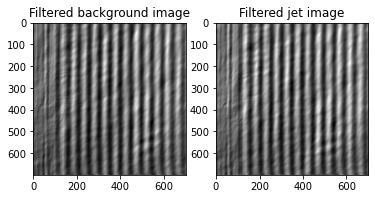

In [133]:
bgFilImage = fftpack.ifft2(bgFFTCopy).real
jetFilImage = fftpack.ifft2(jetFFTCopy).real

fig,(axBg, axJet) = plt.subplots(1,2)
axBg.imshow(bgFilImage, plt.cm.gray)
axJet.imshow(jetFilImage, plt.cm.gray)
axBg.set_title('Filtered background image')
axJet.set_title('Filtered jet image')

#Scale images

In [134]:
#bgScaledImage = exposure.rescale_intensity(bgFilImage, out_range=(0, 4 * np.pi))
#jetScaledImage = exposure.rescale_intensity(jetFilImage, out_range=(0, 4 * np.pi))

#fig,(axBg, axJet) = plt.subplots(1,2)
#axBg.imshow(bgScaledImage, plt.cm.gray)
#axJet.imshow(jetScaledImage, plt.cm.gray)
#axBg.set_title('Scaled background image')
#axJet.set_title('Scaled jet image')

# Unwrap phase

Text(0.5, 1.0, 'Jet phase')

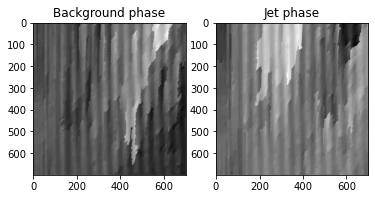

In [135]:
bgPhase = unwrap_phase(bgFilImage)
jetPhase = unwrap_phase(jetFilImage)

fig,(axBg, axJet) = plt.subplots(1,2)
axBg.imshow(bgPhase, plt.cm.gray)
axJet.imshow(jetPhase, plt.cm.gray)
axBg.set_title('Background phase')
axJet.set_title('Jet phase')

# Subtract background

Text(0.5, 1.0, 'Jet image')

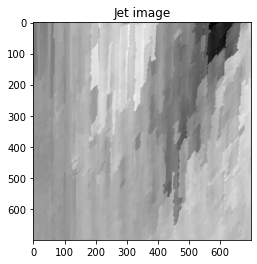

In [136]:
jetImage = jetPhase - bgPhase

fig, axJet = plt.subplots(1)
axJet.imshow(jetImage, plt.cm.gray)
axJet.set_title('Jet image')